## Finding the boundary

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
img_binary = plt.imread(r'j.png')

In [27]:
K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)) # rectangular kernel with 5 x 5 dimensions
K_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) # ellipse
K_c = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)) # cross

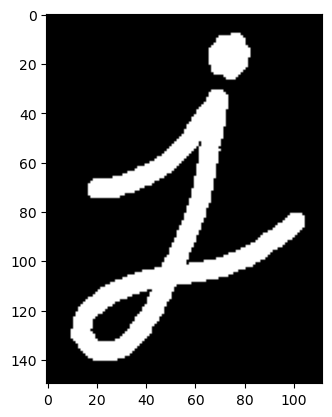

In [29]:
im_bool = np.array(img_binary[:,:,0],dtype = bool) # converting image to bool image
plt.imshow(im_bool,cmap='gray')

### creating holes

In [32]:
H = np.random.rand(im_bool.shape[0],im_bool.shape[1])

In [34]:
H_binary = H<0.98

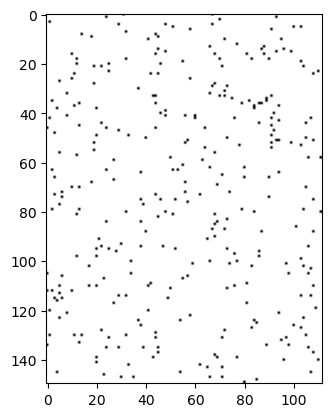

In [36]:
plt.imshow(H_binary,cmap='gray')

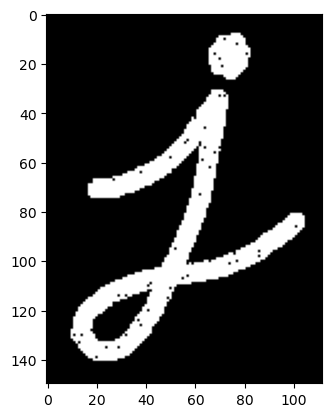

In [38]:
img_H = im_bool & H_binary
plt.imshow(img_H,cmap='gray')

In [40]:
C_r = cv2.morphologyEx(np.float32(img_H),cv2.MORPH_CLOSE,K_r)

### finding boundary using built in function

In [42]:
G_r = cv2.morphologyEx(C_r,cv2.MORPH_GRADIENT,K_r)

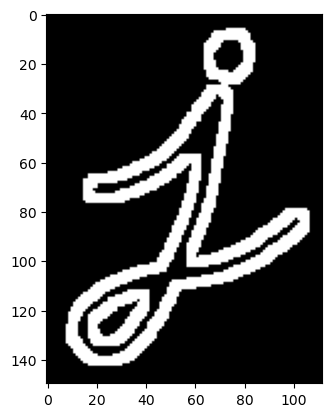

In [44]:
plt.imshow(G_r,cmap='gray')

#### manually subtracting dilation from erosion

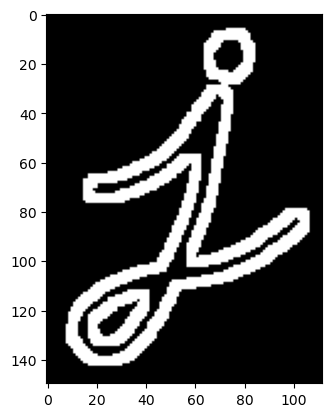

In [54]:
D_r = cv2.dilate(np.float32(C_r),K_r)
E_r = cv2.erode(np.float32(C_r),K_r)
G_r2 = D_r - E_r
plt.imshow(G_r2,cmap='gray')

Text(0.5, 1.0, 'manually finding gradient')

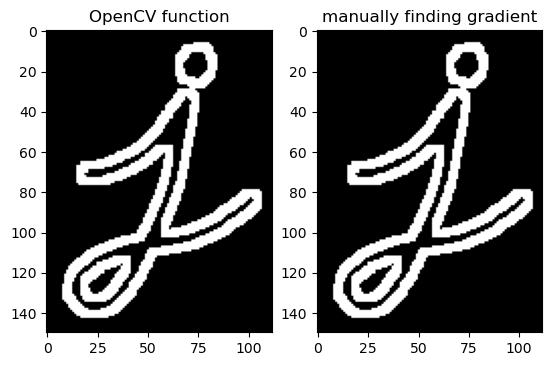

In [56]:
plt.subplot(121)
plt.imshow(G_r,cmap='gray')
plt.title("OpenCV function")
plt.subplot(122)
plt.imshow(G_r2,cmap='gray')
plt.title("manually finding gradient")